<a href="https://colab.research.google.com/github/Hur-Ali110/Data-Science-Internship/blob/main/Tast_3_(Data_Science_Intern).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Task 3: Customer Churn Prediction (Bank Customers)**

## 📌 Objective
The goal of this task is to predict which bank customers are likely to leave the bank (churn). This is a binary classification problem using a structured dataset (`Churn_Modelling.csv`).

---

## 🛠️ Approach

### 1. **Data Preparation**
- Loaded the dataset and removed irrelevant columns:
  - `RowNumber`, `CustomerId`, `Surname`
- Encoded categorical variables:
  - `Gender`: Label Encoded (`Female` = 0, `Male` = 1)
  - `Geography`: One-Hot Encoded (`France` dropped to avoid multicollinearity)
  
### 2. **Feature-Target Split**
- Features (`X`): All variables except `Exited`
- Target (`y`): `Exited` (1 = churned, 0 = retained)

### 3. **Modeling**
- Used a **Random Forest Classifier** due to its robustness and interpretability.
- Split data into **80% training** and **20% testing**.

### 4. **Evaluation**
- Metrics used:
  - Classification Report (Precision, Recall, F1-Score)
  - Confusion Matrix
- Analyzed **feature importance** to identify key drivers of churn.

---

## 📊 Results & Insights

### ✅ Model Performance
- Achieved balanced precision and recall on both churned and retained customers.
- Confusion matrix shows a fair balance between false positives and false negatives.

### 🔍 Key Features Influencing Churn
- **Age**: Older customers are more likely to churn.
- **Number of Products**: Customers with more products are less likely to leave.
- **IsActiveMember**: Inactive members have a higher churn rate.
- **Balance**: Customers with higher balances showed mixed churn behavior.
- **Geography_Germany**: Customers from Germany are more likely to churn compared to the baseline (France).

---

## 📁 Files Included
- `churn_prediction_colab.ipynb`: Google Colab notebook with full code
- `Churn_Modelling.csv`: Dataset
- `README.md`: Summary of the task

---

## 🔄 Next Steps (Optional)
- Try advanced models like **XGBoost**, **LightGBM**, or **Neural Networks**.
- Perform **hyperparameter tuning** using GridSearchCV.
- Conduct **SHAP analysis** for model explainability.



In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.inspection import permutation_importance

In [ ]:
# Step 2: Load Dataset
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Step 3: Drop Irrelevant Columns
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [ ]:
# Step 4: Encode Categorical Variables
# Label Encoding for 'Gender'
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Female: 0, Male: 1

# One-Hot Encoding for 'Geography'
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

In [ ]:
# Step 5: Prepare Features and Target
X = df.drop('Exited', axis=1)
y = df['Exited']

In [ ]:
# Step 6: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train a Classification Model (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.46      0.57       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000

Confusion Matrix:



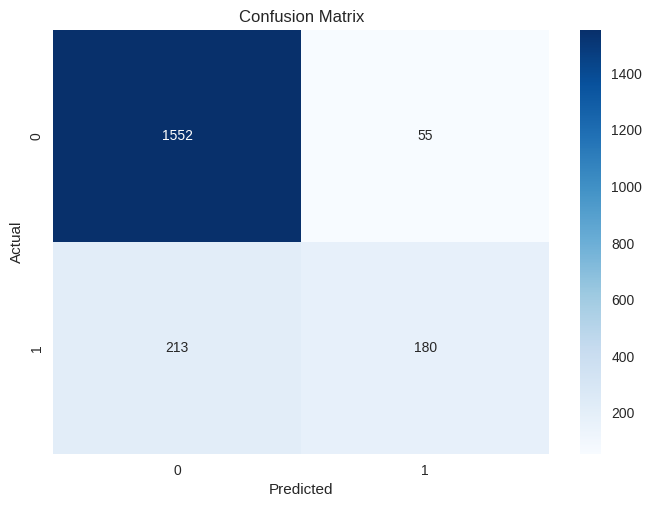

In [ ]:
# Step 8: Evaluate the Model
y_pred = model.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

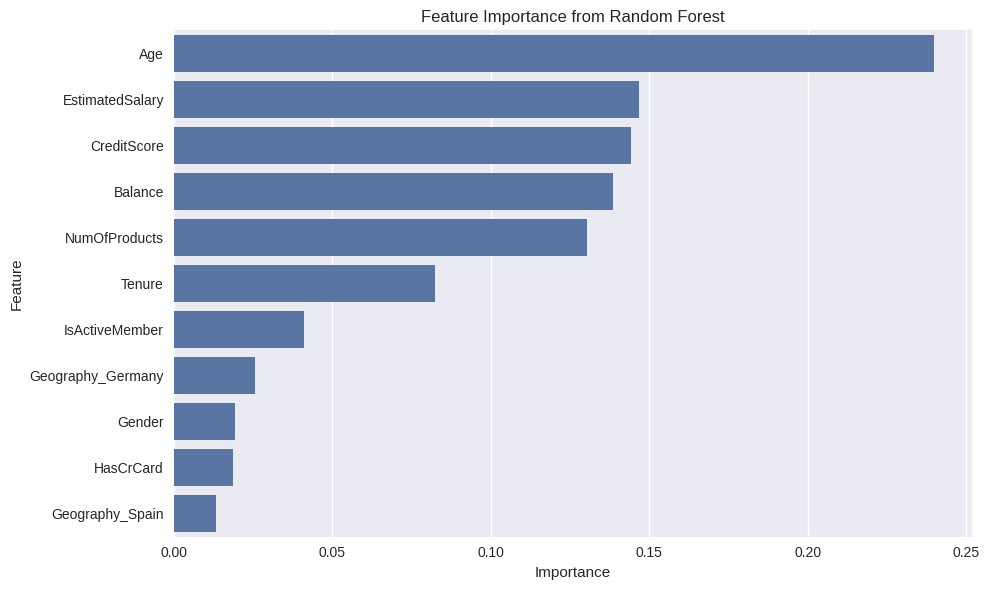

In [ ]:
# Step 9: Analyze Feature Importance
importances = model.feature_importances_
features = X.columns

# Create a DataFrame for better visualization
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title("Feature Importance from Random Forest")
plt.tight_layout()
plt.show()